# Image PCA

In [1]:
! pip3 install tqdm

In [2]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
from tqdm import tqdm

(1080, 1920, 3)


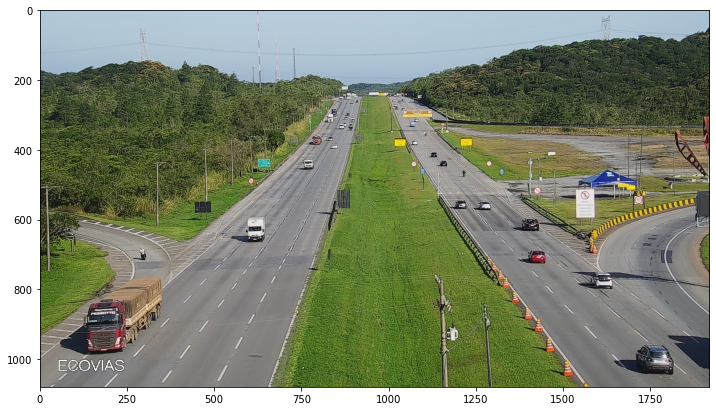

In [3]:
image_raw = imread("./data/images/ecovias-001.jpeg")
print(image_raw.shape)

plt.figure(figsize=[12,8])
plt.imshow(image_raw)

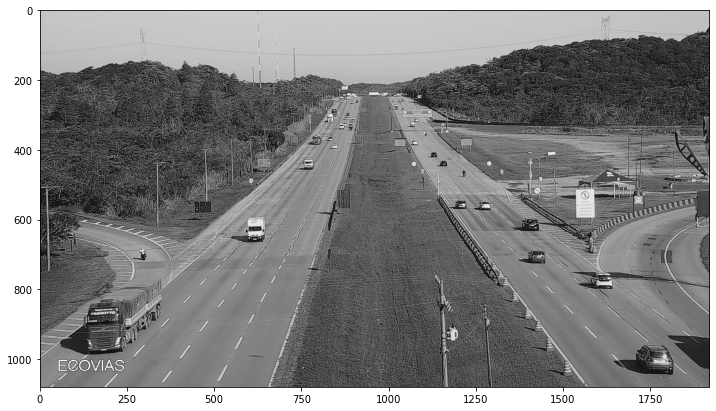

In [4]:
image_sum = image_raw.sum(axis=2)

image_bw = image_sum/image_sum.max()

plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap=plt.cm.gray)

Number of components explaining 99% variance: 543


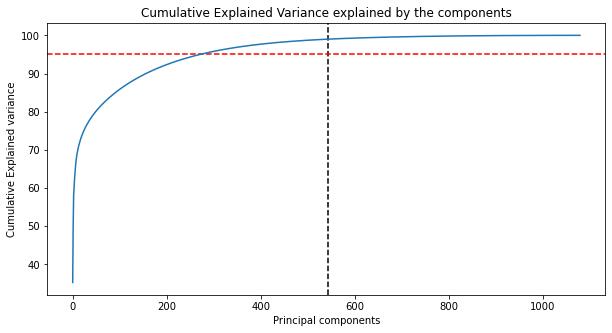

In [5]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(image_bw)

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
variance_desired = 99

k = np.argmax(var_cumu>variance_desired)
print("Number of components explaining", str(variance_desired)+"%", "variance:", str(k))

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

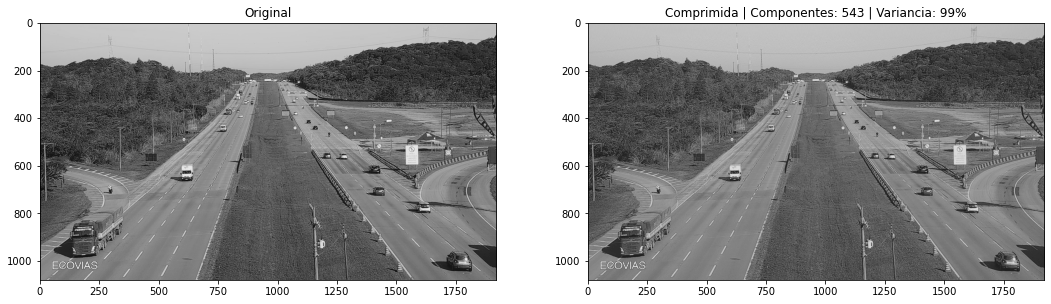

In [6]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

# ORIGINAL
plt.figure(figsize=[18, 13.5])
plt.subplot(1, 2, 1)
plt.imshow(image_bw, cmap=plt.cm.gray)
plt.title("Original")
# COMPRESSED
plt.subplot(1, 2, 2)
plt.imshow(image_recon,cmap = plt.cm.gray)
plt.title("Comprimida | Componentes: " + str(k) + " | Variancia: " + str(variance_desired) + "%")
plt.show()

In [11]:
def new_image(img):
    lin = img.shape[0]
    col = img.shape[1]
    img_out = np.zeros([lin, col])
    return img_out, lin, col

def impower(img, c, g):
    img_out, lin, col = new_image(img)
    for y in tqdm(range(lin)):
        for x in range(col):
            r = img[y][x]
            img_out[y][x] = c * r**g
    
    img_out = img_out/255**g
    return img_out

In [12]:
img_out_01 = impower(image_bw, 1, 1.5)

100%|██████████| 1080/1080 [00:02<00:00, 432.96it/s]


In [14]:
img_out_02 = impower(image_recon, 1, 1.5)

100%|██████████| 1080/1080 [00:02<00:00, 439.80it/s]


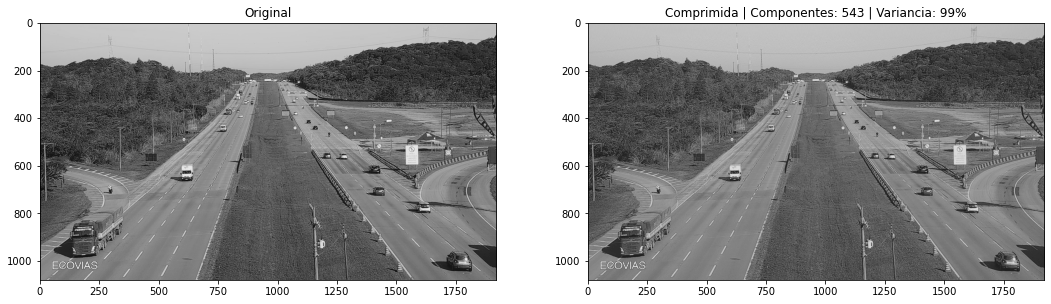

In [15]:
# ORIGINAL
plt.figure(figsize=[18, 13.5])
plt.subplot(1, 2, 1)
plt.imshow(image_bw, cmap=plt.cm.gray)
plt.title("Original")
# COMPRESSED
plt.subplot(1, 2, 2)
plt.imshow(image_recon,cmap = plt.cm.gray)
plt.title("Comprimida | Componentes: " + str(k) + " | Variancia: " + str(variance_desired) + "%")
plt.show()